# Color Masking, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

Image dimensions: (450, 660, 3)


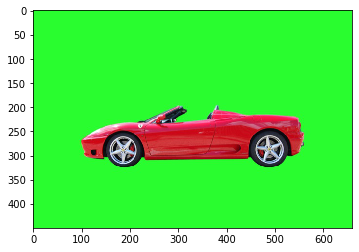

In [2]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

# Display the image
plt.imshow(image)

### Define the color threshold

In [3]:
# Define our color selection boundaries in RGB values

lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])



### Create a mask

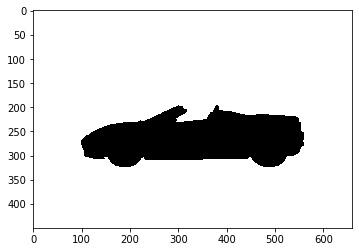

In [8]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask

plt.imshow(mask, cmap='gray')


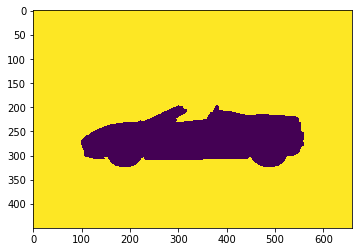

In [9]:
plt.imshow(mask)

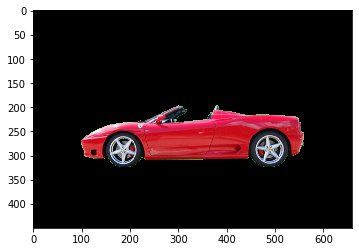

In [12]:
# Mask the image to let the car show through

masked_img = np.copy(image)
masked_img[mask != 0] = [0, 0, 0]
plt.imshow(masked_img)

## TODO: Mask and add a background image

(575, 1024, 3)
(450, 660, 3)


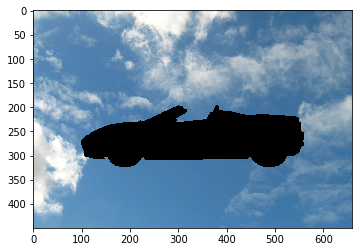

In [19]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
plt.imshow(background_image)
print(background_image.shape)

## TODO: Crop it or resize the background to be the right size (450x660)
# Hint: Make sure the dimensions are in the correct order!
background_crop = background_image[(575-450)//2:-(575-450)//2, (1024-660)//2:-(1024-660)//2,:]
plt.imshow(background_crop)
print(background_crop.shape)

## TODO: Mask the cropped background so that the car area is blocked
# Hint: mask the opposite area of the previous image
masked_background = np.copy(background_crop)
masked_background[mask == 0] = [0, 0, 0]

## TODO: Display the background and make sure 
plt.imshow(masked_background)

### TODO:  Create a complete image

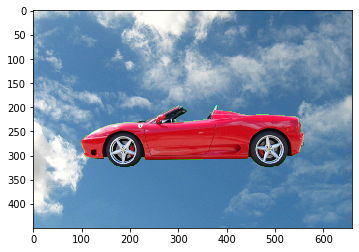

In [20]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background

complete_image = masked_image + masked_background
plt.imshow(complete_image)